# Survey Model


This notebook summarizes the steps in the development process for our survey model.

### The data

The model leverages a [public dataset](https://wwwn.cdc.gov/nchs/nhanes/default.aspx) from the National Health and Nutrition Examination Survey (NHANES). NHANES is a national survey that monitors the health and nutrional status of adults and children across the US. NHANES is run by the National Center for Health Statistics (NCHS). NCHS is part of centers for disease control and prevention (CDC) and is responsible for producing vital and health statistics for the nation. The public database contains data to 40+ surveys that were each conducted 12 times between 1999-2020. 

### EDA & Data Pipeline

We explored roughly half of the survey files available in the database. For our final model we are using {XXX} different survey files spanning years of {YYY}. Our repository contains links to our jupyter notebooks used for creating our data-pipeline {link goes here} & performing exploratory data analysis (EDA) {link goes here}. 

### Model Development Process

#### Model Objective

The objective of our model is to predict whether a survey respondent is depressed. Our project is oriented around predicting PPD. To frame the model towards PPD we are filtering the dataset to include women that have been pregnant. Hence, we are making the assumption that if a previously pregnant woman is depressed they are suffering from PPD. There are limitations in this approach which we will disuss further.
- The outcome variable is binary indicator variable called "MDD". The value is 1 if the individual has been diagnosed & is taking medication related to depression. 
- The input variables include data around demographic traits, medical & physical health, mood/behavioral data.

#### Guiding Principles

- Model interpretability: The model is meant to screen individuals with risk of depression. If the model is highly accurate, but acts as a black box it won't be very useful in further diagnosing. The respondent and medical practioner should understand what markers are used & how depressed individuals are identified. 
- Less features the better: The model will be surfaced through a front-end web application that requires an individual to answer the survey. The survey needs to be short enough where it is easy to answer. 
- Unethical biases: We need to ensure that the model is able to work effectively across all demographic segments. The key segments we will evaluate are; A) race & B) socioeconomic status.

#### 1) Generate Baseline Models

We explored several options during the training phase in an effort to build the best model and better understand our target sample. We explored the following 6 classifiers for our model;
- Logistic Regression: XXX
- Random Forest: XXX
- Decision Tree: XXX
- K-Nearest Neighbor (KNN): XXX
- Naive Bayes: XXX
- Gradient Boosting Classifier: XXX


Evaluation criteria:
- Primary: Recall given core objective of “screening” & highlighting patients at risk.
- Secondary: F1 to balance precision

#### 2) Error Analysis

We first look at model performance at different groupings; 
- 1) Positive class: using the evaluation criterion on the observations in the test set that are labelled as depressed (MDD=1. This is the key grouping as we ultimately want to ensure the screener properly flags those with risk.
- 2) Negative class: using the evaluation criterion on the observations in the test set that are labelled as non-depressed (MDD=0). 
- 3) macro average: The artithmetic mean of the evaluation criterion across classes. For example, if the recall of class 1 is 100 and recall of class 0 is 50, then the macro average is 75.
- 4) weighted avgerage: Similar to macro average as it includes performance across all class, but weights it based on class representation. There are more respondents in the negative class, hence that class will have a larger weighting.

We will particularly focus on the performance of the positive class. The objective is to understand features of the test set across false positives, false negatives, true positives, & true negatives. We will primarily focus on minimizing false negatives among observations that are indeed depressed. The main lever we will have for improving the model based on the error analysis will be feature selection & feature engineering.


#### 3) Feature Selection & Engineering

The baseline model will use the 10 depression screener columns. Those columns are standard for screening depression, hence we figure is a reasonable place to start. Our process for feature selection & engineering will roughly follow the process below:

- 1) Feature selection based on domain knowledge & error analysis; 
 - Domain knowledge: we have identified key categories that have been identified through research as risk markers for depression. Such markers include but not limited to recent stress/anxiety, health, & socieconomic status. We'll look for features within each of the buckets that are correlated to the target variable.
 - Error analysis: Based on initial error analysis, we want to understand what are the values among the feature columns where the model is right vs wrong. To improve recall we will start by identifying other features that are correlated to the target column, but importantly, have high variance when existing feature columns may be misleading. For example, if the key column from the depression screener has a low value, but the individual is depressed we want to find candidate columns to supplement & act as a fall back.
- 2) Feature engineering to supplement existing features & enhance existing features. 
 - Supplement existing features: We will explore creating custom columns that take other features as inputs. For example, if an individual scored high across multiple depression screener columns we can create a new column as a flag to highlight that. In addition we will compare whether there are non-linear relationships with variables & create features that are the square of a depression screener question for example.
 - Enhance existing features: We will explore binning continous columns that may have a strong correlation to the target, but are sparse. 

#### 4) Positive Class Imbalance

Positive class imbalance: Across our entire dataset ~4% of respondents have MDD=1. Among preganant woman, ~10% have MDD=1. We explored 3 stragies to account for this;
- SMOTE: XXX
- Test/Train Proportion: XXX
- Adding additional survey years: XXX

#### 5) Hyperparameter Tuning

Via gridsearch brute force

#### 6) Ensemble Methods

Explore using combination of multiple models in cases where some are less confident in prediction.

#### 7) Segmentation & Bias

Segmentation: Compare performance when across several groups; A) all respondents B) males only C) females only D) females that have been preganant only. This is used to understand potential differences in predicting depression among different audiences. We will also compare performance across subgroups within each of these. For example, measuring performance among previously pregnant females by race.

#### 8) Final Model

Pipeline for creating final model

#### 9) Discussion

Conclusions

Data Limitations

Future research


# Setup

### Load Packages

In [3]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance

/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [4]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1]
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 863)


### Candidate Features

Here we list out all candidate features for our model. 

In [5]:
candidate_features = [
    # Depression screener
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks',
    # Alcohol & smoking
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    #Blood Pressure & Cholesterol
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    #Cardiovascular Health
    'chest_discomfort',
    # Diet & Nutrition
    'how_healthy_is_your_diet',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    #'breastfed',
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza',
    #Food Security
    'emergency_food_received',
    'food_stamps_used',
    #'wic_benefit_used',
    #Hospital Utilization & Access to Care
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Medical Conditions
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule',
    #Physical Activity
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',
    # Physical health & Medical History
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',        
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',
    'general_health_condition',    
    'has_diabetes',
    'has_overweight_diagnosis',  
    #Reproductive Health
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc',
    #Smoking
    'smoked_100_cigs',
    'currently_smoke',
    #Weight History
    'height_in',
    'weight_lbs',
    'attempt_weight_loss_1yr',
    # Demographic data
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

dep_screener_cols = candidate_features[0:10] 
len(candidate_features)

116

### Functions

In [1]:
## ###############################################################################
## function to create test & train dataset

def get_model_data(original_df, 
                   columns, 
                   test_size_prop=0.2,
                   drop_null_rows=False,
                   null_imputer_strategy='median', # mean, median, most_frequent
                   use_value_scaler=True,
                   use_smote=False):
    """
    Function to build feature & indicator matrices for both train & test.
    """
    
    # add target column (MDD)
    cols_to_use = columns.copy()
    cols_to_use.insert(0, 'MDD')
    
    df_to_use = original_df[cols_to_use]
    
    if drop_null_rows:
        df_to_use.dropna(inplace=True)
    
    # Create test & train data
    x = df_to_use.iloc[:,1:].values
    y = df_to_use['MDD'].values
    
    if not drop_null_rows:
        # SimpleImputer() = fill in missing values
        # note imputer may drop columns if no values exist for it
        imputer = SimpleImputer(strategy=null_imputer_strategy)  
        x = imputer.fit_transform(x)

    # RobustScaler() = scale features to remove outliers
    if use_value_scaler:
        trans = RobustScaler()
        x = trans.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(
        x, 
        y, 
        test_size=test_size_prop, 
        random_state=42
    ) 
    
    # Technique to de-risk from positive class imbalance
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    return x_train, x_test, y_train, y_test

## ###############################################################################
## Function to get performance across different models

def get_performance_df(label_actual, label_pred, model_name):
    """
    Function to calculate performance metrics for model.
    Includes precision, recal, F1, & support.
    """
    # create classification report
    result_table = classification_report(label_actual, label_pred, output_dict=True)
    result_table = pd.DataFrame.from_dict(result_table)

    # store for later
    accuracies = result_table['accuracy']

    # rename grouping
    result_table.columns = [
        'depressed_no',
        'depressed_yes',
        'accuracy',
        'macro_avg',
        'weighted_avg'
    ]

    # create dataframe with 1 row per grouping
    result_table.drop(labels = 'accuracy', axis = 1, inplace=True)
    result_table = result_table.transpose()
    result_table['accuracy'] = list(accuracies)
    result_table = result_table.reset_index()
    result_table.rename(columns = {'index':'grouping'},inplace=True)
    result_table['model'] = model_name
    result_table = result_table[['model','grouping','precision','recall','f1-score','support','accuracy']]
    return result_table

def generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test):
    """
    Function that trains and makes predictions using 5 of the classifiers went over during the class.
    Meant as a helper function for easier testing of different modeling pipelines.
    """

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred_labels_knn  = knn.predict(x_test)
    score_knn = get_performance_df(y_test, pred_labels_knn,'Knn')
    
    # Logistic Regression
    lm = LogisticRegression()
    lm.fit(x_train, y_train)
    pred_labels_lr  = lm.predict(x_test)
    score_lr = get_performance_df(y_test, pred_labels_lr,'Logistic Regression')
        
    # Bernoulii Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    pred_labels_bnb  = bnb.predict(x_test)
    score_bnb = get_performance_df(y_test, pred_labels_bnb,'Bernoulli Naive Bayes')    
        
    # Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    pred_labels_gnb  = gnb.predict(x_test)
    score_gnb = get_performance_df(y_test, pred_labels_gnb,'Gaussian Naive Bayes')    

    # Random Forest
    rf = RandomForestClassifier(random_state=0)
    rf.fit(x_train, y_train)
    pred_labels_rf  = rf.predict(x_test)
    predictions_posterior_rf = rf.predict_proba(x_test)
    score_rf = get_performance_df(y_test, pred_labels_rf,'Random Forest')   
    
    #Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred_labels_dt = dt.predict(x_test)
    score_dt = get_performance_df(y_test, pred_labels_dt,'Decision Tree')

    #Gradient Boosting Classifier
    gb = GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    pred_labels_gb = gb.predict(x_test)
    score_gb = get_performance_df(y_test, pred_labels_gb,'Gradient Boosting Classifier')
    
    # make dataframe with scores
    scores = pd.concat([score_knn, score_lr, score_bnb, score_gnb, score_rf, score_dt, score_gb])
    scores = scores.sort_values(by = 'recall', ascending=False)

    # determine which groupings to include
    #if not show_all_groupings:
    #    scores = scores[scores['grouping'] == 'macro_avg']
        
    # make dataframe with predictions
    predictions = pd.DataFrame({
        'actuals':y_test,
        'pred_knn':pred_labels_knn,
        'pred_logistic_regression':pred_labels_lr,
        'pred_bernoulli_naive_bayes':pred_labels_bnb,
        'pred_gaussian_naive_bayes':pred_labels_gnb,
        'pred_random_forest':pred_labels_rf,
        'pred_decision_tree':pred_labels_dt,
        'pred_gradient_boosting_classifier':pred_labels_gb
    })

    return scores, predictions

## ###############################################################################
## Function for Error analysis

def plot_confusion_matrix(y_test, pred_labels):
    """
    Function that displays a confusion matrix for provided true and predicted classes
    """
    #print(f'cover type 1 and type 2 total correct {np.sum(np.diag(metrics.confusion_matrix(y_test, pred_labels))[:2])}')

    cm = confusion_matrix(y_test, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5,5))
    disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')    
    plt.grid(False)
    plt.show()
    return

def label_pred(row):
    """
    Function that labels prediction cases into TP, TN, FP, FN
    """
    if row['y_actual'] == row['y_pred']:
        if row['y_actual'] == 1:
            result = 'TP'
        else:
            result = 'TN'
    else: 
        if row['y_actual'] == 1:
            result = 'FN'
        else:
            result = 'FP'

    return result

def create_error_plots(
    y_actuals,
    y_predictions,
    x_test_matrix,
    x_test_columns,
    columns_to_plot,
    show_bar_plot=True,
    show_density_plot=True):
    """
    Function that creates bi-variate plots comparing TP, TN, FP, FN for each desired feature column.
    """
    
    ### Create dataframe of predictions & feature 
    
    # create dataframe with actuals & predictions w/ labels
    prediction_labels = pd.DataFrame(columns = ['y_actual','y_pred'])
    prediction_labels['y_actual'] = y_actuals
    prediction_labels['y_pred'] = y_predictions
    prediction_labels['label'] = prediction_labels.apply(label_pred, axis = 1)

    # feature df 
    feature_df = pd.DataFrame(x_test_matrix, columns = x_test_columns)

    # combine into 1
    pred_data = pd.concat([prediction_labels, feature_df], axis = 1)

    ### Bi-variate plots
    for column in columns_to_plot:
    
        if show_density_plot:
            ## Density plot
            sns.kdeplot(
                data=pred_data, 
                x=column, 
                hue="label", 
                cut=0, 
                common_norm=False, 
                alpha=0.4
            )

        if show_bar_plot:
            ## barplot
            # create % of total column by group
            group_data = pred_data.groupby(['label',column])['y_actual'].count().reset_index()
            group_data['Pct of Total'] = group_data['y_actual'] / group_data.groupby('label')['y_actual'].transform('sum')

            sns.catplot(
                data=group_data, 
                kind="bar",
                x=column, 
                y="Pct of Total", 
                hue="label",
                alpha = 0.8
            )

        plt.show()

# 1) Baseline Model

We start by building baseline models across the 6 classifiers. We start by using the 10 questions from the depression screener questionaire.

In [121]:
x_train, x_test, y_train, y_test = get_model_data(
    original_df = cdc_survey_pmom,
    columns = dep_screener_cols
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

baseline_model, predictions = generate_models(
    x_train, 
    y_train, 
    x_test, 
    y_test
)

baseline_model_summary = baseline_model[baseline_model['grouping'] == 'macro_avg']
baseline_model_summary[['model','recall','f1-score','precision','accuracy']]

(6192, 10)
(1549, 10)
(6192,)
(1549,)


,model,recall,f1-score,precision,accuracy
2,Bernoulli Naive Bayes,0.675232,0.632390,0.614506,0.826985
2,Gaussian Naive Bayes,0.660506,0.633699,0.618641,0.840542
2,Decision Tree,0.550559,0.558043,0.575025,0.863138
2,Random Forest,0.543840,0.555191,0.688099,0.896062
2,Logistic Regression,0.538270,0.546401,0.685605,0.896062
2,Knn,0.534046,0.539683,0.655004,0.893480
2,Gradient Boosting Classifier,0.519854,0.513698,0.719752,0.897999


Naive Bayes are the best

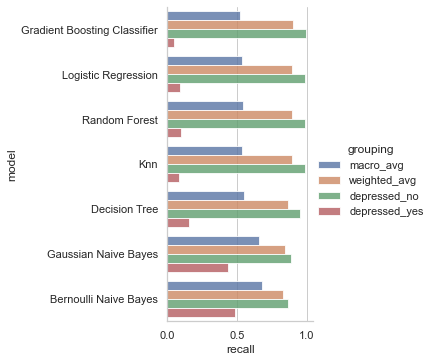

In [39]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='recall', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

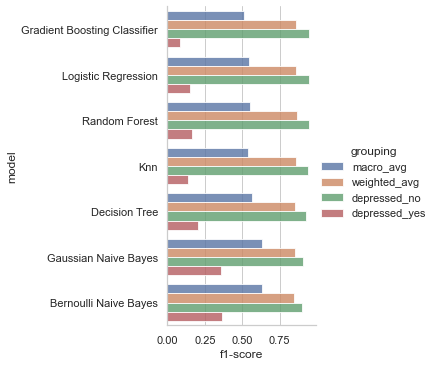

In [23]:
sns.catplot(
    data=baseline_model, 
    kind="bar",
    x='f1-score', 
    y="model", 
    hue="grouping",
    hue_order=['macro_avg','weighted_avg','depressed_no','depressed_yes'],
    alpha = 0.8
)

pass

We see low recall among the depressed_yes group (positive class). This will be the emphasis on future model enhancements.

# 2) Error Analysis

# 3) Feature Selection & Engineering

# 4) Positive Class Imbalance

# 5) Hyperparameter Tuning

# 6) Ensemble Methods

# 7) Segmentation & Bias

# 8) Final Model

# 9) Discussion